In [70]:
%matplotlib inline

import matplotlib

import json
import pandas as pd
import matplotlib.pyplot as plt

tweets_data_path = './twitter_data_zika.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")

tweets = pd.DataFrame()

for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

type(tweets_data)
len(tweets_data)

for idx in range(1,6523):
    rowTmp = tweets_data[idx]
    t = rowTmp['text']
    l = rowTmp['lang']
    temp = pd.DataFrame({'text': t, 'lang': l}, index=[idx])
    tweets = pd.concat([tweets, temp])
    
print(len(tweets))

6522


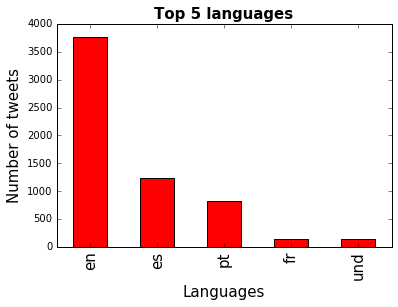

In [71]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
